<a href="https://colab.research.google.com/github/xoxominji/22-1-ESAA-Practice/blob/main/0502_%EB%B0%95%EB%AF%BC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[개념정리] 및 [필사]

## 파이썬 머신러닝 완벽 가이드 CH 8 텍스트 분석
1-3, 5 pg. 466-486, 497-512

### 8.1 텍스트 분석 이해

: 비정형 텍스트 데이터 분석

**텍스트 분석 수행 프로세스**
1. 텍스트 사전 준비작업(텍스트 전처리): 대/소문자 변경, 특수문자 삭제, 단어 등 토큰화 작업, 의미없는 단어(Stop word)제거, 어근 추출(Stemming/Lemmatization) 등
2. 피처 벡터화(Feature Vectorization)/피처 추출(Feature Extraction): 가공된 텍스트에서 word 기반의 피처 추출, 피처에 단어 빈도수와 같은 숫자 값을 부여해 벡터값으로 표현
  - BOW(Bag of Wrods)
      - Count
      - TF-IDF
  - Word2Vec
3. ML 모델 수립 및 학습/예측/평가


**파이썬 기반의 NLP, 텍스트 분석 패키지**
- NLTK: 수행 속도 측면의 아쉬움
- Gensim: 토픽 모델링 분야(Word2Vec)
- SpaCy: 뛰어난 수행 능력




### 8.2 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

- 클렌징(Cleasing) : 불필요한 문자, 기호 제거 ex) HTML, XML테그, 특정 기호
- 텍스트 토큰화 (Tokenization)
  - 문장 토큰화 : 마침표(.), 개행문자(\n) 등 마지막을 뜻하는 기호 따라 분리
  
    `from nltk import sent_tokenize`

    *각 문장이 가지는 시맨틱적인 의미가 주요한 요소로 사용될 때 수행*



In [1]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


- 
  - 단어 토큰화 : 공백, 콤마(,), 마침표(.), 개행문자(\n)

    `from nltk import word_tokenize`

    단어 순서가 안중요한 BOW 경우 단어 토큰화만

In [2]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [3]:
from nltk import word_tokenize, sent_tokenize

#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):
    
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행. 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


- 스톱 워드 제거

In [4]:
#stopwords 목록 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [7]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드 제거하는 반복문
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 스톱 워드 제거하는 반복문
    for word in sentence:
        #소문자로 모두 변환합니다. 
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


- Stemming과 Lemmatization
  - Stemming: 원형 단어로 변환 시 일반적인 방법을 적용, 더 단순화된 방법으로 원래 단어에서 일부 철자가 훼손된 어근 단어 추출
  - Lemmatization: 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어 추출 (시간多)




```
from nltk.stem import LancasterStemmer #Porter, Lancaster, Snowball
stemmer = LancasterSTemmer()
stemmer.stem('문자') #단어 추출
```



In [8]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [9]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v')) #단어 품사 입력: 'v', 'a'
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
amuse amuse amuse
happy happy
fancy fancy


### 8.3 Bag of Words - BOW

: 단어에 대한 빈도 값 부여해 피처 값 추출

`'단어': #인덱스 값#`

단점: 문맥 의미(Semantic Context) 반영 부족, 희소 행렬 문제(대규모의 칼럼으로 구성된 행렬에서 대부분의 값이 0으로 채워지는 행렬)

- BOW 피처 벡터화 : 모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수/정규화된 빈도를 값으로 부여하는 데이터 세트 모델로의 변경

  - M개의 문서 x N개의 단어 피처
  

- 사이킷런의 Count 및 TF-IDF 벡터화 구현
  - CountVectorizer: 카운트만 부여

  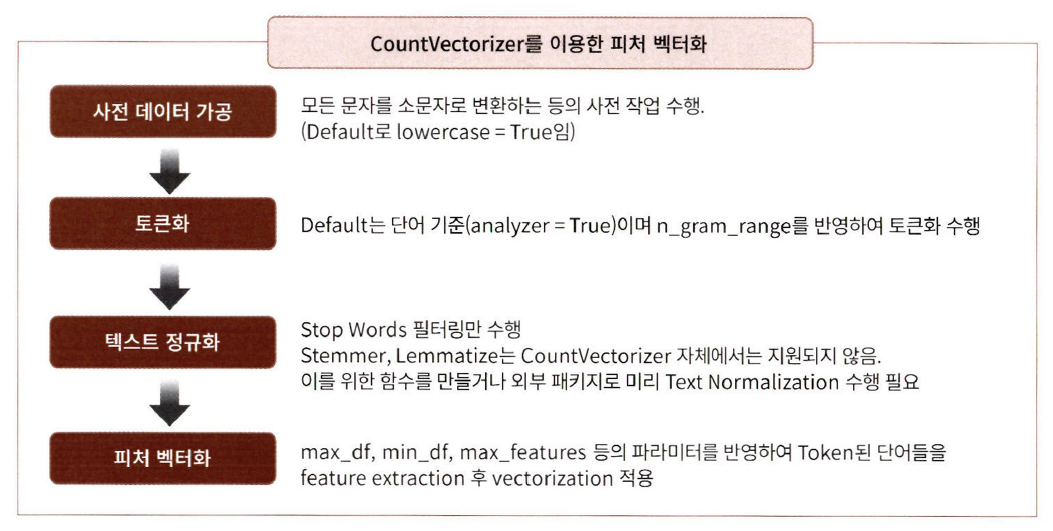

  - TfidfVectorizer: 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티 부여


- BOW 벡터화를 위한 희소 행렬 : 적은 메모리 공간을 차지할 수 있도록 변환 필요
- 희소 행렬 - COO 형식
  - `[[3,0,1], [0,2,0]]`
  - 0이 아닌 데이터: `[3,1,2]`
  - 0이 아닌 데이터가 있는 위치 (row, col): `(0,0), (0,2), (1,1)`
  - row, column 별 배열 저장: `[0,0,1], [0,2,1]`

In [10]:
import numpy as np

dense = np.array( [ [ 3, 0, 1 ], [0, 2, 0 ] ] )

In [11]:
from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [12]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

- 희소 행렬 - CSR 형식 : 행 위치 배열 내에 있는 고유한 값의 시작 위치만 다시 별도의 위치 배열로 가지는 변환 방식

In [13]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [14]:
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])
coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

### 8.5 감성 분석(Sentiment Analysis)

: 문서 내 텍스트가 나타내는 여러 가지 주관적인 단어와 문맥을 기반으로 감성(Sentiment) 수치 계산

- 지도학습 기반 감성 분석 실습 – IMDB 영화평

In [15]:
import pandas as pd

review_df = pd.read_csv('/content/drive/MyDrive/2022-1 ESAA/데이터/word2vec/labeledTrainData.tsv', header=0, sep="\t", quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [16]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [17]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환 
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )

In [18]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(feature_df, class_df, test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization수행. 
# LogisticRegression의 C는 10으로 설정. 
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용하여 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc때문에 수행.  
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


예측 정확도는 0.8860, ROC-AUC는 0.9503


In [20]:
# 스톱 워드는 english, filtering, ngram은 (1,2)로 설정해 TF-IDF 벡터화 수행. 
# LogisticRegression의 C는 10으로 설정. 
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8936, ROC-AUC는 0.9598


> Count < TF-IDF 기반 피처 벡터화의 예측 성능

- 비지도학습 기반 감성 분석 소개
  - 감성 사전: 긍정 감성, 부정 감성의 정도를 의미하는 수치(감성 지수)를 가짐, 단어의 위치/주변단어/문맥/POS(Part of Speech) 등을 참고해 결정
  - NLP의 WordNet 모듈
  - SentiWordNet
  - VADER
  - Pattern

- SentiWordNet을 이용한 Sentiment Analysis
  - WordNet Synset과 SentiWordNet SentiSynset 클래스의 이해

In [21]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [22]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성. 
synsets = wn.synsets(term)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 갯수:', len(synsets))
print('synsets() 반환 값 :', synsets)

#의미.품사.의미 구분 인덱스

synsets() 반환 type : <class 'list'>
synsets() 반환 값 갯수: 18
synsets() 반환 값 : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [23]:
for synset in synsets :
    print('##### Synset name : ', synset.name(),'#####')
    print('POS :',synset.lexname())
    print('Definition:',synset.definition())
    print('Lemmas:',synset.lemma_names())

##### Synset name :  present.n.01 #####
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
##### Synset name :  present.n.02 #####
POS : noun.possession
Definition: something presented as a gift
Lemmas: ['present']
##### Synset name :  present.n.03 #####
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
##### Synset name :  show.v.01 #####
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name :  present.v.02 #####
POS : verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
##### Synset name :  stage.v.01 #####
POS : verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represen

단어의 상호 유사도

In [24]:
# synset 객체를 단어별로 생성합니다. 
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree , lion , tiger , cat , dog]
similarities = []
entity_names = [ entity.name().split('.')[0] for entity in entities]

# 단어별 synset 들을 iteration 하면서 다른 단어들의 synset과 유사도를 측정합니다. 
for entity in entities:
    similarity = [ round(entity.path_similarity(compared_entity), 2)  for compared_entity in entities ]
    similarities.append(similarity)
    
# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame형태로 저장합니다.  
similarity_df = pd.DataFrame(similarities , columns=entity_names,index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [25]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type :', type(senti_synsets))
print('senti_synsets() 반환 값 갯수:', len(senti_synsets))
print('senti_synsets() 반환 값 :', senti_synsets)

senti_synsets() 반환 type : <class 'list'>
senti_synsets() 반환 값 갯수: 11
senti_synsets() 반환 값 : [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [26]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ',fabulous .pos_score())
print('fabulous 부정감성 지수: ',fabulous .neg_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0


fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125


- 
  - SentiWordNet을 이용한 영화 감상평 감성 분석
  1. 문서를 문장 단위로 분해
  2. 문장을 단어 단위로 토큰화하고 품사 태깅
  3. 품사 태깅된 단어 기반으로 synset 객체와 senti_synset 객체 생성
  4. senti_synset에서 긍정 감성/부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때 긍정, 아닐 땐 부정 감성으로 결정

In [27]:
from nltk.corpus import wordnet as wn

# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return 

In [28]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

In [29]:
review_df['preds'] = review_df['review'].apply( lambda x : swn_polarity(x) )
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix( y_target, preds))
print("정확도:", np.round(accuracy_score(y_target , preds), 4))
print("정밀도:", np.round(precision_score(y_target , preds),4))
print("재현율:", np.round(recall_score(y_target, preds), 4))

[[7668 4832]
 [3636 8864]]
정확도: 0.6613
정밀도: 0.6472
재현율: 0.7091


- VADER를 이용한 감성 분석

  별도의 모듈로 셋업 가능 


```
pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
```



In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0]) #딕셔너리 형태의 감성 점수 구하기 
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [32]:
def vader_polarity(review,threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반하여 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환 
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용하여 레코드별로 vader_polarity( )를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply( lambda x : vader_polarity(x, 0.1) )
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix( y_target, vader_preds))
print("정확도:", np.round(accuracy_score(y_target , vader_preds),4))
print("정밀도:", np.round(precision_score(y_target , vader_preds),4))
print("재현율:", np.round(recall_score(y_target, vader_preds),4))

[[ 6736  5764]
 [ 1867 10633]]
정확도: 0.6948
정밀도: 0.6485
재현율: 0.8506


지도학습 분류 기반의 예측 성능에 비해서는 낮은 수준, but 일정 수준 만족 가능